In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium as fol
import pickle

%matplotlib inline

In [6]:
print("Read data and filter columns")
data = pd.read_csv('data/On_Time_On_Time_Performance_2017_1.csv')
data = data.merge(airlines, how='left', left_on='AirlineID', right_on='Code', right_index=True)
print("# of columns before: {}".format(data.columns.size))
data = data[[
    'Year', 'Month', 'DayofMonth', 'DayOfWeek',
    'CarrierName', 'CarrierCode', 'FlightNum', 'TailNum',
    'Origin', 'Dest',
    'CRSDepTime', 'DepTime', 'DepDelay', 'CRSArrTime', 'ArrTime', 'ArrDelay',
    'CRSElapsedTime', 'ActualElapsedTime', 'Distance',
    'Cancelled', 'CancellationCode', 'Diverted',
    'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'
]]
data['Flights'] = 1
print("# of columns  after: {}".format(data.columns.size))
data

Read data and filter columns


/home/thierry/bin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# of columns before: 112
# of columns  after: 28


,Year,Month,DayofMonth,DayOfWeek,CarrierName,CarrierCode,FlightNum,TailNum,Origin,Dest,...,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Flights
0,2017,1,17,2,American Airlines Inc.,AA,494,N583AA,CLT,PHX,...,1773.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1
1,2017,1,18,3,American Airlines Inc.,AA,494,N544AA,CLT,PHX,...,1773.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1
2,2017,1,19,4,American Airlines Inc.,AA,494,N553AA,CLT,PHX,...,1773.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1
3,2017,1,20,5,American Airlines Inc.,AA,494,N191AA,CLT,PHX,...,1773.0,0.0,NaN,0.0,33.0,0.0,0.0,0.0,0.0,1
4,2017,1,21,6,American Airlines Inc.,AA,494,N170AA,CLT,PHX,...,1773.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1
5,2017,1,22,7,American Airlines Inc.,AA,494,N179AA,CLT,PHX,...,1773.0,0.0,NaN,0.0,0.0,0.0,8.0,0.0,17.0,1
6,2017,1,23,1,American Airlines Inc.,AA,494,N579AA,CLT,PHX,...,1773.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1
7,2017,1,24,2,American Airlines Inc.,AA,494,N583AA,CLT,PHX,...,1773.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1
8,2017,1,25,3,American Airlines Inc.,AA,494,N167AA,CLT,PHX,...,1773.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1
9,2017,1,26,4,American Airlines Inc.,AA,494,N551AA,CLT,PHX,...,1773.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1


In [36]:
import pickle

airports_loc_pairs = pd.read_pickle('data/airport_coordinates.pickle')
airports_loc = pd.DataFrame([[iata, loc[0], loc[1]] for iata, loc in airports_loc_pairs.items() if loc], columns=['Code', 'Lat', 'Lng'])
airports_loc = airports_loc.set_index('Code')
airports_loc

airports_delay = data[['DepDelay', 'Origin']].groupby('Origin').quantile(q=0.9)
airports_flights = data[['Flights', 'Origin']].groupby('Origin').sum()
airports_delay = airports_delay.merge(airports_flights, how='left', left_index=True, right_index=True)
airports_delay = airports_delay.merge(airports_loc, how='left', left_index=True, right_index=True)
airports_delay.to_csv('data/airports-delay.csv')
airports_delay

,DepDelay,Flights,Lat,Lng
Origin,,,,
ABE,58.8,191,40.651940,-75.440560
ABI,98.2,28,32.411390,-99.681940
ABQ,34.0,1395,35.040278,-106.609167
ABR,65.1,62,45.449170,-98.421940
ABY,48.0,82,31.535560,-84.194440
ACT,58.3,104,31.611390,-97.230560
ACV,35.6,92,40.978060,-124.108610
ACY,33.6,341,39.457500,-74.577220
ADK,25.8,9,51.878060,-176.646110


count      298.000000
mean      1510.124161
std       3476.898295
min          1.000000
25%         84.000000
50%        212.500000
75%        924.000000
max      30138.000000
Name: Flights, dtype: float64

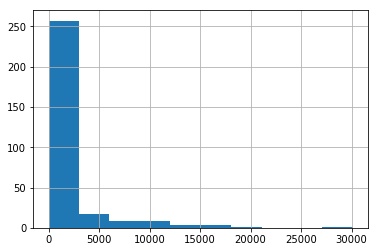

In [17]:
airports_delay.Flights.hist()
airports_delay.Flights.describe()

count    298.000000
mean      43.630201
std       24.413599
min       -4.300000
25%       28.775000
50%       40.000000
75%       53.750000
max      182.200000
Name: DepDelay, dtype: float64

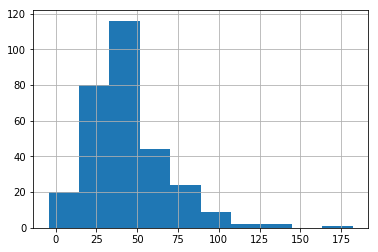

In [37]:
airports_delay.DepDelay.hist()
airports_delay.DepDelay.describe()

44.151249999999976

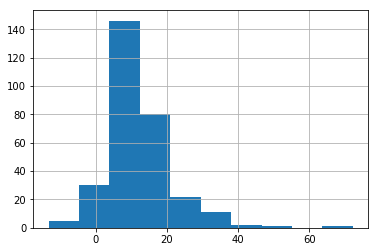

In [28]:
delay_avg = airports_delay.DepDelay / airports_delay.Flights
delay_avg.hist()
delay_avg.quantile(q=0.99)

In [5]:
airlines = pd.read_csv('data/L_AIRLINE_ID.csv', index_col='Code')
airports = pd.read_csv('data/L_AIRPORT.csv', index_col='Code')

airlines_splitted = airlines.Description.apply(lambda d: d.split(': '))
airlines['CarrierName'] = airlines_splitted.apply(lambda d: d[0])
airlines['CarrierCode'] = airlines_splitted.apply(lambda d: d[-1])
airlines = airlines.drop('Description', axis=1)

airports_splitted = airports.Description.apply(lambda d: d.split(': '))
airports['AirportLocation'] = airports_splitted.apply(lambda d: d[0])
airports['AirportName'] = airports_splitted.apply(lambda d: d[-1])
airports = airports.merge(airports_loc, how='left', left_index=True, right_index=True)
airports = airports.drop('Description', axis=1)

airports

,AirportLocation,AirportName,Lat,Lng
Code,,,,
01A,"Afognak Lake, AK",Afognak Lake Airport,62.946389,-152.275833
03A,"Granite Mountain, AK",Bear Creek Mining Strip,65.548056,-161.071667
04A,"Lik, AK",Lik Mining Camp,NaN,NaN
05A,"Little Squaw, AK",Little Squaw Airport,NaN,NaN
06A,"Kizhuyak, AK",Kizhuyak Bay,NaN,NaN
07A,"Klawock, AK",Klawock Seaplane Base,NaN,NaN
08A,"Elizabeth Island, AK",Elizabeth Island Airport,NaN,NaN
09A,"Homer, AK",Augustin Island,NaN,NaN
1B1,"Hudson, NY",Columbia County,NaN,NaN


In [7]:
travel_base_url = "https://www.travelmath.com/airport/"
airport_coordinates_file = 'data/airport_coordinates.pickle'

import requests as rq
from bs4 import BeautifulSoup as bs
import pickle
import os

def get_coordinates_for_airport(airport_code):
    req = rq.get(travel_base_url+airport_code)
    cont = bs(req.text, 'html.parser')
    lat_long_elem = [ e for e in cont.select('div.leftcolumn p') if "Latitude/Longitude:" in e.text][0]
    lat_long = list(lat_long_elem.children)[1].split(",")
    lat, long = list(map(float, lat_long))
    return lat, long

def save_coords(airport_code, n):
    if n % 100 == 0:
        print("Airport {}".format(n))
    try:
        lat, long = get_coordinates_for_airport(airport_code)
        return airport_code, (lat, long)
    except Exception:
        return airport_code, None
    
if os.path.exists(airport_coordinates_file):
    with open(airport_coordinates_file, 'rb') as f:
        codes = pickle.load(f)
else:
    from concurrent import futures

    with futures.ProcessPoolExecutor(20) as executor:
        results = [executor.submit(save_coords, code, i) for i, code in enumerate(airports.index)]
        done, not_done = futures.wait(results)
    
    codes = {}

    for future in done:
        airport_code, long_lat = future.result()
        codes[airport_code] = long_lat

    with open(airport_coordinates_file, 'wb') as f:
        pickle.dump(codes, f)

In [92]:
# Download data zip from https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time
# Data exists from January 1987 to September 2017

from urllib.request import urlretrieve
from IPython.display import clear_output
from concurrent import futures
import os
import math
from time import sleep

transtats_base_download_url = "https://transtats.bts.gov/PREZIP/"
filename_template = "On_Time_On_Time_Performance_{year}_{month}.zip"

class DownloadHandler(object):
    def __init__(self, downloads):
        self.downloads = downloads
        self.status = {}
    
    def start(self, parallelism=None):
        print("Starting downloads...")
        with futures.ThreadPoolExecutor(parallelism) as executor:
            results = [executor.submit(self.download_routes_zip, *args) for args in self.downloads]
            while not self.done():
                self.print_status()
                sleep(5)
            done, not_done = futures.wait(results)
            print("All done!")
    
    def done(self):
        return all(map(lambda x: x[0] == 1, self.status.values()))
    
    def print_status(self):
        for filename, (percent, total) in self.status.items():
            print("{}: {:<30} [{}%, size={}]".format(filename, "#"*int(math.round(30*percent)), percent, total))
    
    def download_routes_zip(self, year, month):
        filename = filename_template.format(year=year, month=month)
        dl_url = transtats_base_download_url + filename
        dest_path = 'data/' + filename
        if os.path.exists(dest_path) and os.stat(dest_path).st_size > 0:
            self.status[filename] = (1, os.stat(dest_path).st_size)
        else:
            urlretrieve(dl_url, dest_path, reporthook=self.create_download_hook(filename))
            print("Downloaded: {}".format(filename))

    def create_download_hook(self, filename):
        def hook(downloaded_blocks, block_size, total_size):
            self.status[filename] = (min(downloaded_blocks * block_size / total_size, 1), total_size)
            print(self.status[filename])

to_download = []
for year in range(1987, 2018):
    for month in range(1, 13):
        if not (year == 2017 and month >= 10):
            to_download.append((year,month))
            
dh = DownloadHandler(to_download)
dh.start()

Starting downloads...
All done!


In [ ]:
routes = None

In [216]:
import zipfile
from io import BytesIO

year = 2016
for month in range(1,13):
    with zipfile.ZipFile('data/On_Time_On_Time_Performance_{year}_{month}.zip'.format(year=year, month=month), 'r') as z:
        for filename in z.namelist():
            if filename.endswith(".csv"): 
                df = pd.read_csv(BytesIO(z.read(filename)))
                new_routes = pd.DataFrame({'count': df.groupby(["OriginAirportID", "DestAirportID"]).size()})
                if routes is None:
                    routes = new_routes
                else:
                    routes = routes.add(new_routes, fill_value=0).astype(int) # type is converted to float when using add

/home/cranium/.anaconda3/envs/ada/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [241]:
import zipfile
from io import BytesIO

routes = None

# Sum of delays for year 2016 per airport, granularity of month
year = 2016
month = 10
for month in range(1,13):
    with zipfile.ZipFile('data/On_Time_On_Time_Performance_{year}_{month}.zip'.format(year=year, month=month), 'r') as z:
        for filename in z.namelist():
            if filename.endswith(".csv"): 
                df = pd.read_csv(BytesIO(z.read(filename)))
                per_airport = df.groupby(['Origin'])
                new_routes = pd.DataFrame({'flights': per_airport.size(), 'total_delays': per_airport['DepDelayMinutes'].sum()})
                new_routes = new_routes.set_index([new_routes.index, [month]*len(new_routes)])
                new_routes.index.names = ["Airport", "Month"]
                if routes is None:
                    routes = new_routes
                else:
                    routes = pd.concat([routes, new_routes])

/home/cranium/.anaconda3/envs/ada/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/cranium/.anaconda3/envs/ada/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/cranium/.anaconda3/envs/ada/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/cranium/.anaconda3/envs/ada/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (48,77,84,85) have mixed types. Specify dtype option on import or s

In [262]:
routes = routes.loc[routes.index.sort_values()]
with open('data/airport_delays_2016_months.json', 'w') as f:
    routes.to_csv(f, encoding='utf-8')

In [112]:
delay_columns = list(c for c in df.columns if "Delay" in c)
delay_columns

['DepDelay',
 'DepDelayMinutes',
 'DepartureDelayGroups',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrivalDelayGroups',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'DivArrDelay']